In [3]:
#importing general libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
from statsmodels.datasets import get_rdataset
import sklearn
import sklearn.model_selection as skm

In [2]:
#importing Decision Tree libraries
from sklearn.tree import (DecisionTreeClassifier as DTC, DecisionTreeRegressor as DTR, plot_tree , export_text)
from sklearn.metrics import (accuracy_score , log_loss)
#from sklearn.ensemble import (RandomForestRegressor as RF, GradientBoostingRegressor as GBR)

In [3]:
#reading csv training set into a data frame
df = pd.read_csv('Econ424_W2024_PC2_training_set_v1.csv')

In [4]:
#X = np.asarray(df)

In [5]:
#storing the explanatory/independent variables in a new array (features are our 'X')
X = df.drop(columns=['LOGVALUE'])

In [6]:
#putting feature column names into a list
feature_names = X.columns

In [43]:
#splitting data into training and validation sets (train versus test)
(X_train, X_test , y_train , y_test) = skm.train_test_split(X, df['LOGVALUE'], test_size=0.3, random_state=0)

In [54]:
#creating a regression tree with fixed depth using sklearn DecisionTreeRegressor
reg = DTR(max_depth=7)
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7)

In [55]:
#using k-fold cross validation to find best alpha which minimizes average error
ccp_path = reg.cost_complexity_pruning_path(X_train, y_train)
kfold = skm.KFold(5,shuffle=True,random_state=10)

grid = skm.GridSearchCV(reg,{'ccp_alpha': ccp_path.ccp_alphas},refit=True,cv=kfold, scoring='neg_mean_squared_error')
G = grid.fit(X_train, y_train)

In [56]:
#making predictions for the validation set data using best tree for training set found above
best_ = grid.best_estimator_
pred = best_.predict(X_test)

#finding MSE in validation set
np.mean((y_test - pred)**2)

0.9870020687042144

In [57]:
#finding R^2 in validation set
sklearn.metrics.r2_score(y_test, pred, sample_weight=None, multioutput=None)

0.23601514365953347

In [65]:
full_pred = best_.predict(X)
y_full = df['LOGVALUE']
np.mean((y_full - full_pred)**2)

0.8272458335844721

In [73]:
sklearn.metrics.r2_score(y_full, full_pred, sample_weight=None, multioutput=None)

0.30755200869027843

In [6]:
#plotting scatter graph of predicted vs observed log of house prices from above
plt.scatter(y_test, pred, marker='o', s=15, alpha=0.4, color="red")
plt.grid(True)
plt.xlabel('True Log of House Price')
plt.ylabel('Predicted Log of House Price')
plt.title('Plot of Predicted House Prices vs Observed Values in Validation Set')
#plt.xlim(xmin=0)
plt.show()

NameError: name 'y_test' is not defined

In [59]:
#finding feature importance using provided DTR function from sklearn
feat_importance = best_.feature_importances_

#displaying feature importances
for i in range(len(feature_names)):
    print(feature_names[i] + " : " + str(feat_importance[i]))

BATHS : 0.045742889212189185
BEDRMS : 0.0
BUILT : 0.027641092913693963
UNITSF : 0.20109201781201871
LOT : 0.06924857389295985
ROOMS : 0.27347191391750175
REGION : 0.300474755391475
KITCHEN : 0.0
FLOORS : 0.05145937812389177
LAUNDY : 0.008986290140974082
RECRM : 0.021883088595295436
METRO : 0.0
METRO3 : 0.0


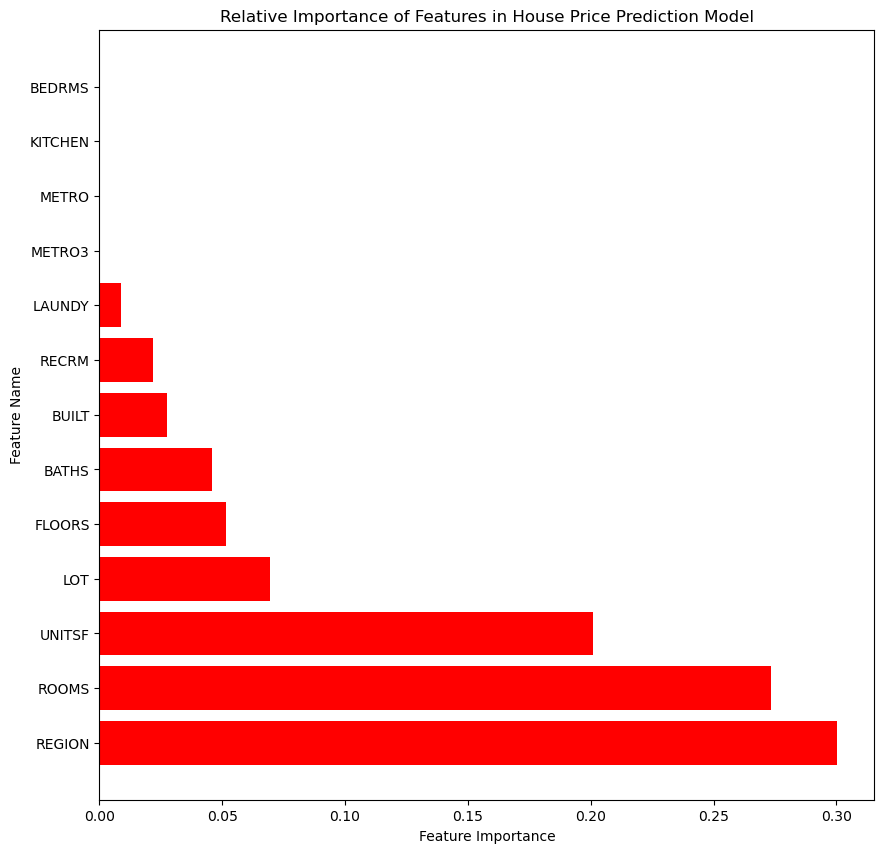

In [60]:
sorted_indices = feat_importance.argsort()[::-1]

# Plotting feature importances
plt.figure(figsize=(10, 10))
plt.barh(range(len(feature_names)), feat_importance[sorted_indices], color="red")
plt.yticks(range(len(feature_names)), feature_names[sorted_indices])
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Relative Importance of Features in House Price Prediction Model')
plt.show()

In [4]:
#reading in test set data from csv file
test_data = pd.read_csv('Econ424_W2024_PC2_test_set_without_response_variable_v1.csv')
test_data.head()

,baths,bedrms,built,unitsf,lot,rooms,region,kitchen,floors,laundy,recrm,metro,metro3
0,3,4,1960,3000.0,44000.0,10,3,1,2,0,0,7,9
1,1,3,1975,3100.0,44000.0,7,2,1,3,0,0,7,2
2,1,2,1940,1480.0,2450.0,4,4,1,2,0,0,1,1
3,2,3,2000,1200.0,11000.0,6,3,1,2,0,0,7,2
4,4,5,2000,3000.0,11000.0,9,3,1,3,1,0,7,2


In [62]:
#making predictions for house prices corresponding test data - using best tree found prior
final_pred = best_.predict(np.asarray(test_data))
final_pred = pd.DataFrame(final_pred)

/Users/arunatchuthananthan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [40]:
print(test_data.shape)

(10000, 13)


In [5]:
#outputting test set predictions to csv file
final_pred.to_csv("preds.csv", index=False, header=False)